In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve, auc
from sklearn.model_selection import StratifiedKFold

import re
import math
import sys
sys.path.insert(0, '../Code')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)


In [3]:
list(iris.target_names)

['setosa', 'versicolor', 'virginica']

In [4]:
df.loc[:,'tipo'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),tipo
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Tiene 3 categorias distintas

In [5]:
df["tipo"].unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

### El dataset no tiene ningun nulo.

In [6]:
df.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
tipo                 0
dtype: int64

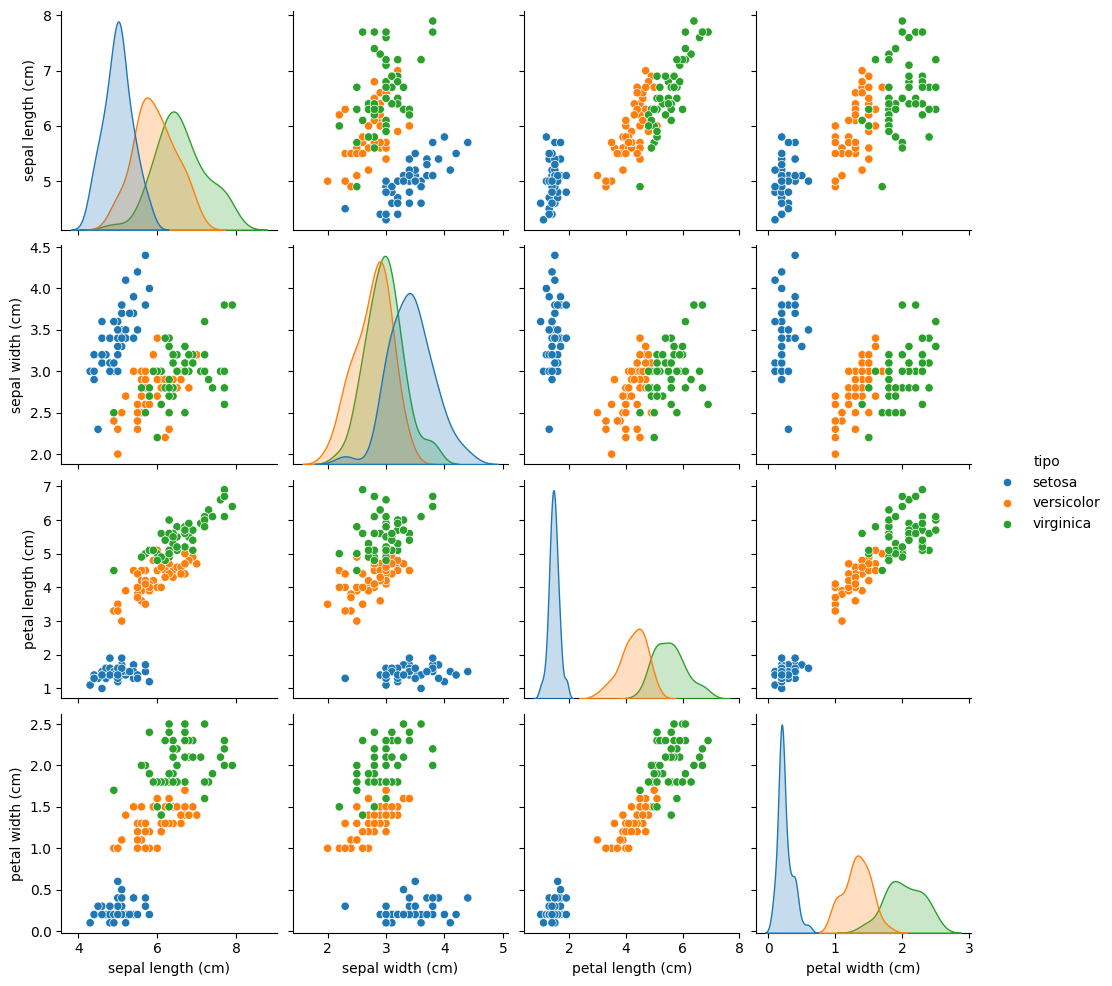

In [7]:
sns.pairplot(df, hue="tipo")

In [8]:
X = df[df.columns.drop("tipo")]
y = df["tipo"]

Text(0, 0.5, 'score')

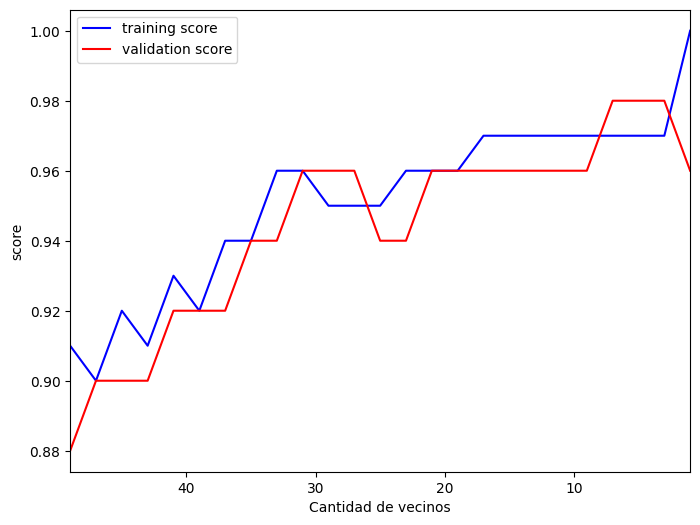

In [9]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
n_neighbors = np.arange(1,50,2)
# Calcular las curvas de validación
train_scores, valid_scores = validation_curve(model, X, y, 
                                              param_name="n_neighbors", 
                                              param_range=n_neighbors[::-1], 
                                              scoring="accuracy", 
                                              cv=3)
plt.figure(figsize=(8, 6)) 
plt.plot(n_neighbors[::-1], np.median(train_scores, 1), color='blue', label='training score')
plt.plot(n_neighbors[::-1], np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlim(max(n_neighbors[::-1]), min(n_neighbors[::-1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('score')

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.3)

In [11]:
model = KNeighborsClassifier(n_neighbors=9)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.9142857142857143


## Me quedo solamente con petal width (cm) and petal petal length (cm), con menos columnas obtengo mejores resultados

In [15]:
X = df.loc[:, ['petal width (cm)', 'petal length (cm)']]
y = df.loc[:, 'tipo']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, train_size=0.3)
model = KNeighborsClassifier(n_neighbors=13)
model.fit(X_train, y_train)
print(model.score(X_test, y_test))


0.9428571428571428


# Backup

Text(0, 0.5, 'score')

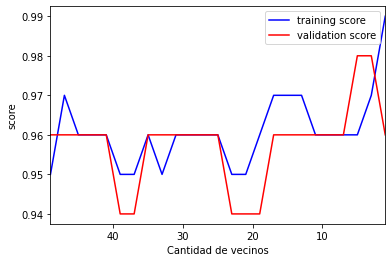

In [42]:
from sklearn.model_selection import validation_curve

model = KNeighborsClassifier()
n_neighbors = np.arange(1,50,2)
# Calcular las curvas de validación
train_scores, valid_scores = validation_curve(model, X, y, 
                                              param_name="n_neighbors", 
                                              param_range=n_neighbors[::-1], 
                                              scoring="accuracy", 
                                              cv=3)
plt.plot(n_neighbors[::-1], np.median(train_scores, 1), color='blue', label='training score')
plt.plot(n_neighbors[::-1], np.median(valid_scores, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlim(max(n_neighbors[::-1]), min(n_neighbors[::-1]))
plt.xlabel('Cantidad de vecinos')
plt.ylabel('score')